In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
p = '../data/'
input_name = 'cleaned_GDP.csv'
df = pd.read_csv(f'{p}{input_name}')
df.head()

,control_number,species_code,genus,species,wildlf_desc,wildlf_cat,cartons,qty,unit,value_x,...,i_e,pt_cd,specific_generic_name,disp_date_yyyy,disp_date_mm,ship_date_yyyy,ship_date_mm,disp_ship_date,ctry_ie_name,2020GDP
0,2018280858,WDER,ODOCOILEUS,VIRGINIANUS,MEA,MAM,NaN_cartons,1.0,NO,500,...,I,LR,WHITE-TAILED DEER,2018,6,2018,6,0 days,Mexico,8506.909
1,2018301780,BLBE,URSUS,AMERICANUS,TRO,MAM,NaN_cartons,1.0,NO,0,...,I,DE,AMERICAN BLACK BEAR,2017,9,2018,6,270 days,Canada,43306.635
2,2018311221,BAEA,HALIAEETUS,LEUCOCEPHALUS,FEA,EGL,NaN_cartons,2.0,NO,0,...,I,NG,BALD EAGLE,2018,6,2018,6,0 days,Mexico,8506.909
3,2018311221,FEHA,BUTEO,REGALIS,FEA,RAP,NaN_cartons,2.0,NO,0,...,I,NG,FERRUGINOUS HAWK,2016,6,2018,6,729 days,Mexico,8506.909
4,2018311221,BAOW,TYTO,ALBA,FEA,RAP,NaN_cartons,1.0,NO,0,...,I,NG,BARN OWL,2016,6,2018,6,729 days,Mexico,8506.909


In [4]:
df.columns

Index(['control_number', 'species_code', 'genus', 'species', 'wildlf_desc',
       'wildlf_cat', 'cartons', 'qty', 'unit', 'value_x', 'ctry_org',
       'ctry_ie', 'purp', 'src', 'trans_mode', 'act', 'dp_cd', 'disp_date',
       'ship_date', 'i_e', 'pt_cd', 'specific_generic_name', 'disp_date_yyyy',
       'disp_date_mm', 'ship_date_yyyy', 'ship_date_mm', 'disp_ship_date',
       'ctry_ie_name', '2020GDP'],
      dtype='object')

In [5]:
df_short = df[['act','ctry_ie','ctry_ie_name','2020GDP']]
df_short['act_bool'] = 0
df_short.head()

C:\Users\yujin\AppData\Local\Temp\ipykernel_23696\3025140657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['act_bool'] = 0


,act,ctry_ie,ctry_ie_name,2020GDP,act_bool
0,R,MX,Mexico,8506.909,0
1,C,CA,Canada,43306.635,0
2,R,MX,Mexico,8506.909,0
3,R,MX,Mexico,8506.909,0
4,R,MX,Mexico,8506.909,0


In [6]:
index_nums = df_short[df_short['act']=='R'].index
for index_num in index_nums:
    df_short.at[index_num,'act_bool']=1
df_short.head()

,act,ctry_ie,ctry_ie_name,2020GDP,act_bool
0,R,MX,Mexico,8506.909,1
1,C,CA,Canada,43306.635,0
2,R,MX,Mexico,8506.909,1
3,R,MX,Mexico,8506.909,1
4,R,MX,Mexico,8506.909,1


In [7]:
index_nums = df_short[df_short['2020GDP'].isnull()].index
for index_num in index_nums:
    df_short.at[index_num,'2020GDP']=0
df_short.head()

,act,ctry_ie,ctry_ie_name,2020GDP,act_bool
0,R,MX,Mexico,8506.909,1
1,C,CA,Canada,43306.635,0
2,R,MX,Mexico,8506.909,1
3,R,MX,Mexico,8506.909,1
4,R,MX,Mexico,8506.909,1


In [8]:
df_short['act'].value_counts(dropna=False)

C    1032741
R      15834
Name: act, dtype: int64

## Trying out clusters = 6 with raw data
(clusters = 3 didn't do much FYI)

In [9]:
km = KMeans(n_clusters=6)
km

KMeans(n_clusters=6)

In [10]:
y_predicted = km.fit_predict(df_short[['2020GDP','act_bool']])
df_short['cluster'] = y_predicted
df_short.head(10)

C:\Users\yujin\AppData\Local\Temp\ipykernel_23696\3609660439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['cluster'] = y_predicted


,act,ctry_ie,ctry_ie_name,2020GDP,act_bool,cluster
0,R,MX,Mexico,8506.909,1,1
1,C,CA,Canada,43306.635,0,0
2,R,MX,Mexico,8506.909,1,1
3,R,MX,Mexico,8506.909,1,1
4,R,MX,Mexico,8506.909,1,1
5,R,MX,Mexico,8506.909,1,1
6,R,MX,Mexico,8506.909,1,1
7,R,MX,Mexico,8506.909,1,1
8,R,MX,Mexico,8506.909,1,1
9,R,MX,Mexico,8506.909,1,1


<function matplotlib.pyplot.legend(*args, **kwargs)>

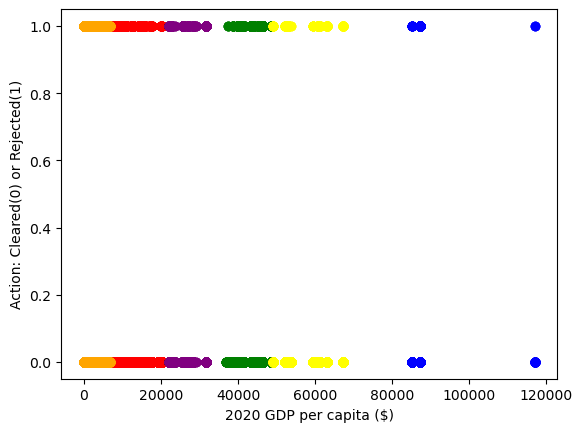

In [11]:
df1 = df_short[df_short.cluster==0]
df2 = df_short[df_short.cluster==1]
df3 = df_short[df_short.cluster==2]
df4 = df_short[df_short.cluster==3]
df5 = df_short[df_short.cluster==4]
df6 = df_short[df_short.cluster==5]

plt.scatter(df1['2020GDP'], df1['act_bool'], color='green')
plt.scatter(df2['2020GDP'], df2['act_bool'], color='red')
plt.scatter(df3['2020GDP'], df3['act_bool'], color='blue')
plt.scatter(df4['2020GDP'], df4['act_bool'], color='orange')
plt.scatter(df5['2020GDP'], df5['act_bool'], color='purple')
plt.scatter(df6['2020GDP'], df6['act_bool'], color='yellow')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('2020 GDP per capita ($)')
plt.ylabel('Action: Cleared(0) or Rejected(1)')
plt.legend

## Trying out clusters = 6 with scaled/transformed data

In [15]:
km = KMeans(n_clusters=6)

In [12]:
scaler = MinMaxScaler()
scaler.fit(df_short[['2020GDP']])
df_short['2020GDP'] = scaler.transform(df_short[['2020GDP']])
df_short.head()

C:\Users\yujin\AppData\Local\Temp\ipykernel_23696\4089144706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['2020GDP'] = scaler.transform(df_short[['2020GDP']])


,act,ctry_ie,ctry_ie_name,2020GDP,act_bool,cluster
0,R,MX,Mexico,0.072669,1,1
1,C,CA,Canada,0.369941,0,0
2,R,MX,Mexico,0.072669,1,1
3,R,MX,Mexico,0.072669,1,1
4,R,MX,Mexico,0.072669,1,1


In [13]:
y_predicted = km.fit_predict(df_short[['2020GDP','act_bool']])
df_short['cluster'] = y_predicted
df_short.head(10)

C:\Users\yujin\AppData\Local\Temp\ipykernel_23696\3609660439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['cluster'] = y_predicted


,act,ctry_ie,ctry_ie_name,2020GDP,act_bool,cluster
0,R,MX,Mexico,0.072669,1,2
1,C,CA,Canada,0.369941,0,3
2,R,MX,Mexico,0.072669,1,2
3,R,MX,Mexico,0.072669,1,2
4,R,MX,Mexico,0.072669,1,2
5,R,MX,Mexico,0.072669,1,2
6,R,MX,Mexico,0.072669,1,2
7,R,MX,Mexico,0.072669,1,2
8,R,MX,Mexico,0.072669,1,2
9,R,MX,Mexico,0.072669,1,2


<function matplotlib.pyplot.legend(*args, **kwargs)>

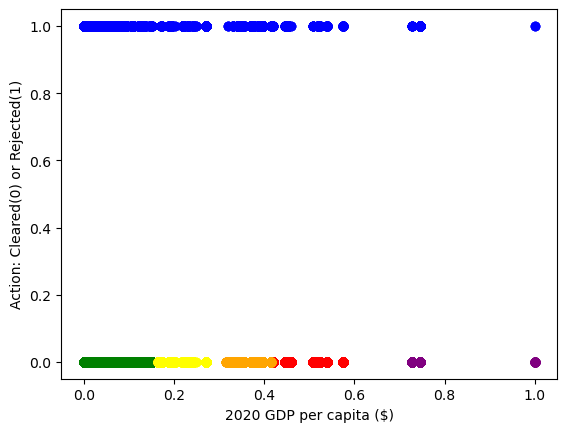

In [14]:
df1 = df_short[df_short.cluster==0]
df2 = df_short[df_short.cluster==1]
df3 = df_short[df_short.cluster==2]
df4 = df_short[df_short.cluster==3]
df5 = df_short[df_short.cluster==4]
df6 = df_short[df_short.cluster==5]

plt.scatter(df1['2020GDP'], df1['act_bool'], color='green')
plt.scatter(df2['2020GDP'], df2['act_bool'], color='red')
plt.scatter(df3['2020GDP'], df3['act_bool'], color='blue')
plt.scatter(df4['2020GDP'], df4['act_bool'], color='orange')
plt.scatter(df5['2020GDP'], df5['act_bool'], color='purple')
plt.scatter(df6['2020GDP'], df6['act_bool'], color='yellow')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('2020 GDP per capita ($)')
plt.ylabel('Action: Cleared(0) or Rejected(1)')
plt.legend

## Trying out clusters = 3 with scaled/transformed data

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_short[['2020GDP','act_bool']])
df_short['cluster'] = y_predicted
df_short.head(10)

C:\Users\yujin\AppData\Local\Temp\ipykernel_23696\1455746189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['cluster'] = y_predicted


,act,ctry_ie,ctry_ie_name,2020GDP,act_bool,cluster
0,R,MX,Mexico,0.072669,1,2
1,C,CA,Canada,0.369941,0,0
2,R,MX,Mexico,0.072669,1,2
3,R,MX,Mexico,0.072669,1,2
4,R,MX,Mexico,0.072669,1,2
5,R,MX,Mexico,0.072669,1,2
6,R,MX,Mexico,0.072669,1,2
7,R,MX,Mexico,0.072669,1,2
8,R,MX,Mexico,0.072669,1,2
9,R,MX,Mexico,0.072669,1,2


<function matplotlib.pyplot.legend(*args, **kwargs)>

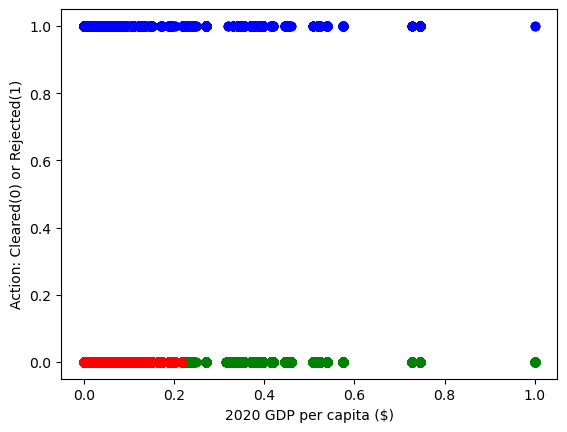

In [17]:
df1 = df_short[df_short.cluster==0]
df2 = df_short[df_short.cluster==1]
df3 = df_short[df_short.cluster==2]

plt.scatter(df1['2020GDP'], df1['act_bool'], color='green')
plt.scatter(df2['2020GDP'], df2['act_bool'], color='red')
plt.scatter(df3['2020GDP'], df3['act_bool'], color='blue')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('2020 GDP per capita ($)')
plt.ylabel('Action: Cleared(0) or Rejected(1)')
plt.legend

## Trying out clusters = 2 with scaled/transformed data

In [18]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_short[['2020GDP','act_bool']])
df_short['cluster'] = y_predicted
df_short.head(10)

C:\Users\yujin\AppData\Local\Temp\ipykernel_23696\2031625296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['cluster'] = y_predicted


,act,ctry_ie,ctry_ie_name,2020GDP,act_bool,cluster
0,R,MX,Mexico,0.072669,1,1
1,C,CA,Canada,0.369941,0,0
2,R,MX,Mexico,0.072669,1,1
3,R,MX,Mexico,0.072669,1,1
4,R,MX,Mexico,0.072669,1,1
5,R,MX,Mexico,0.072669,1,1
6,R,MX,Mexico,0.072669,1,1
7,R,MX,Mexico,0.072669,1,1
8,R,MX,Mexico,0.072669,1,1
9,R,MX,Mexico,0.072669,1,1


<function matplotlib.pyplot.legend(*args, **kwargs)>

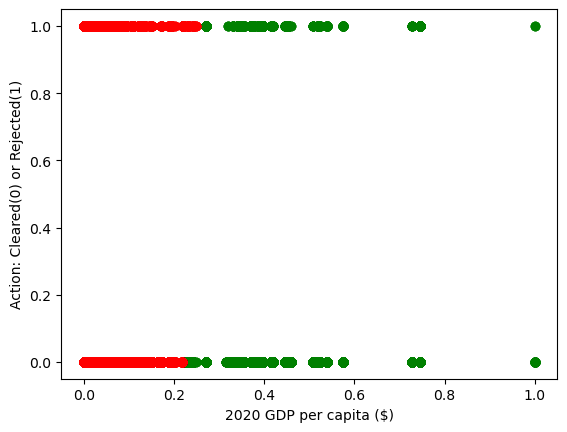

In [19]:
df1 = df_short[df_short.cluster==0]
df2 = df_short[df_short.cluster==1]

plt.scatter(df1['2020GDP'], df1['act_bool'], color='green')
plt.scatter(df2['2020GDP'], df2['act_bool'], color='red')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('2020 GDP per capita ($)')
plt.ylabel('Action: Cleared(0) or Rejected(1)')
plt.legend